In [26]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [27]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path + "/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'

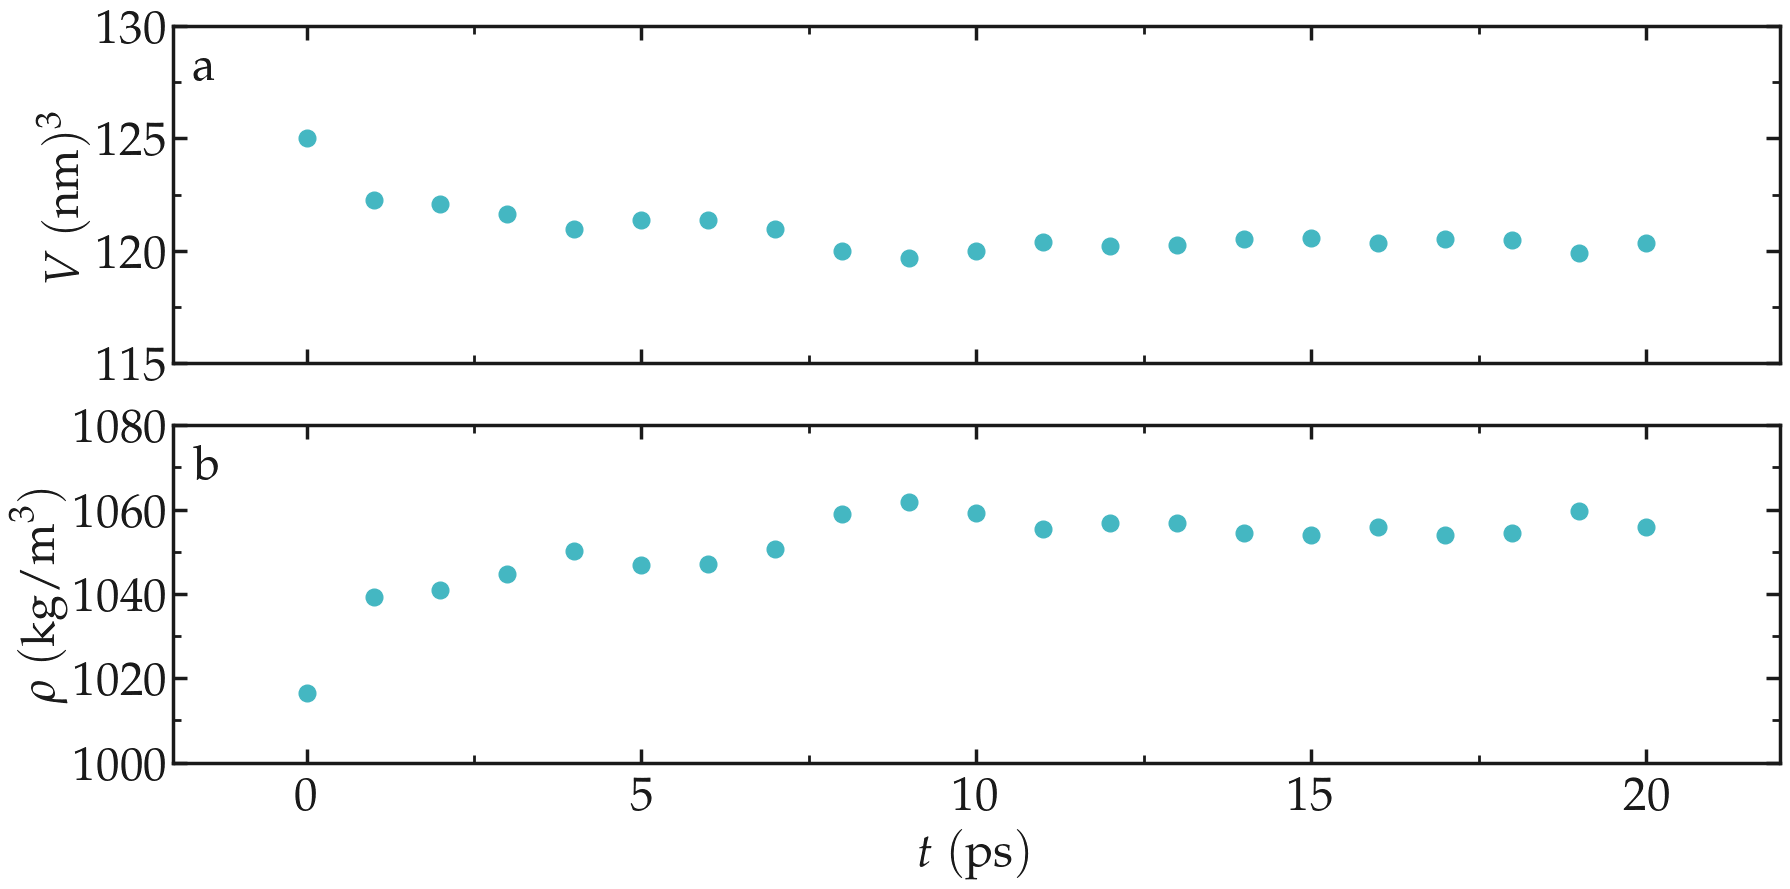

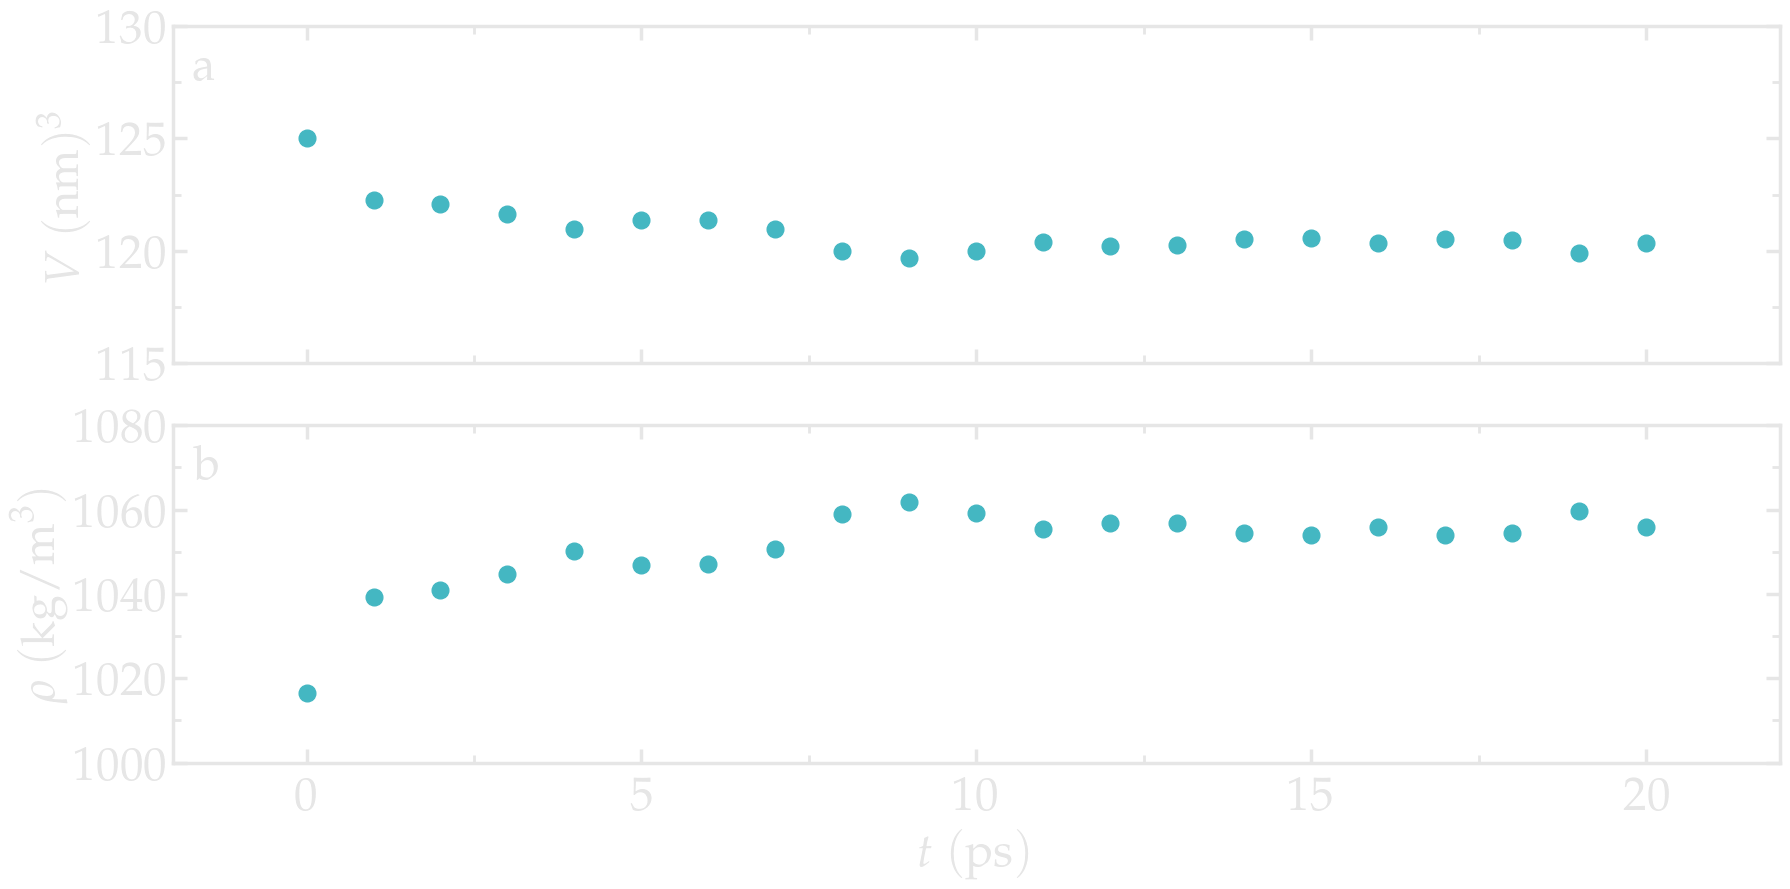

In [37]:
filename = "potential-energy-npt"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,9))
    ax, n, l_tot, c_tot = [], 0, 2, 1

    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    t, energy = np.loadtxt("volume-npt.xvg", skiprows=24).T
    ax[-1].plot(t, energy, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], None, r'$V ~ (\mathrm{nm})^3$',
                   legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 22, 5), x_boundaries=(-2, 22),
                   y_boundaries=(115, 130), y_ticks=np.arange(115, 131, 5))

    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    t, p = np.loadtxt("density-npt.xvg", skiprows=24).T
    ax[-1].plot(t, p, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$t ~ \mathrm{(ps)}$', r'$\rho ~ (\mathrm{kg/m}^3)$', xpad=10,
                   legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 22, 5), x_boundaries=(-2, 22),
                   y_boundaries=(1000, 1080), y_ticks=np.arange(1000, 1081, 20))

    add_subplotlabels(fig, ax, [r"$\textrm{a}$", r"$\textrm{b}$"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)